In [ ]:
# Install SHAP library
!pip install shap

# Install additional libraries for visualization (if not already installed)
!pip install seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
# Step 1: Import necessary libraries
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap  # Import SHAP library

# Step 2: Load the dataset
data = pd.read_csv('Data_file.n2_all.csv')

Correlation of features with target 'Time_Taken':
 time_taken    1.000000
dest_Apb      0.660219
distance      0.193076
dest_Ab       0.105946
Sy            0.065333
Dx            0.019734
dest_Ah      -0.003554
Sx           -0.093630
Dy           -0.101026
src_Ah       -0.181923
dest_Ad      -0.464157
src_Ab       -0.792466
src_Ad       -0.802124
Name: time_taken, dtype: float64


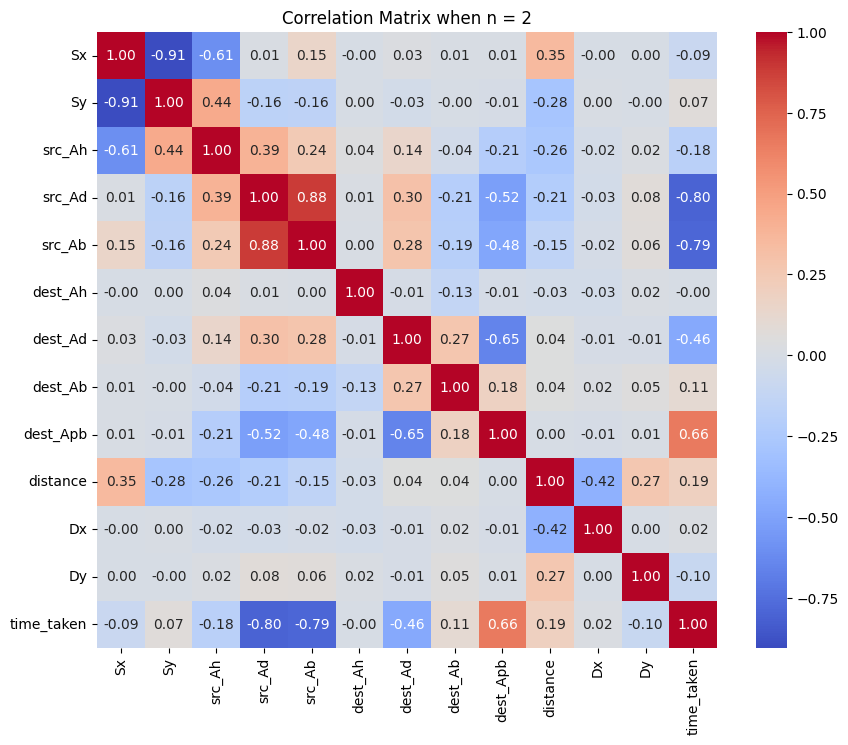

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Step 3: Calculate and visualize correlations
# Calculate correlation matrix
correlation_matrix = data.corr()

# Extract correlation of all features with the target feature
target_correlation = correlation_matrix['time_taken'].sort_values(ascending=False)

# Display correlations
print("Correlation of features with target 'Time_Taken':\n", target_correlation)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix when n = 2')

# Save the figure
plt.savefig('correlation_matrix_n2.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

# Download the figure
from google.colab import files
files.download('correlation_matrix_n2.png')

In [ ]:
# Step 3: Preprocessing
# Separating features and target variable
X = data.drop(columns=['time_taken'])
y = data['time_taken']

# Handling categorical data if any (Example: One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (especially important for algorithms like SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Step 4: Define a function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return round(mse, 3), round(r2, 3), predictions

# Step 5: Train and evaluate various regression models

# 5.1: Linear Regression
linear_model = LinearRegression()
mse_lr, r2_lr, preds_lr = evaluate_model(linear_model, X_train, y_train, X_test, y_test)

# 5.2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
mse_rf, r2_rf, preds_rf = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# 5.3: Support Vector Regressor
svr_model = SVR()
mse_svr, r2_svr, preds_svr = evaluate_model(svr_model, X_train, y_train, X_test, y_test)

# 5.4: K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
mse_knn, r2_knn, preds_knn = evaluate_model(knn_model, X_train, y_train, X_test, y_test)

# 5.5: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
mse_gb, r2_gb, preds_gb = evaluate_model(gb_model, X_train, y_train, X_test, y_test)

# 5.6: XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
mse_xgb, r2_xgb, preds_xgb = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Step 6: Display results
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")
print(f"Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Support Vector Regressor - MSE: {mse_svr}, R2: {r2_svr}")
print(f"K-Nearest Neighbors Regressor - MSE: {mse_knn}, R2: {r2_knn}")
print(f"Gradient Boosting Regressor - MSE: {mse_gb}, R2: {r2_gb}")
print(f"XGBoost Regressor - MSE: {mse_xgb}, R2: {r2_xgb}")



Linear Regression - MSE: 291.332, R2: 0.863
Random Forest Regressor - MSE: 53.346, R2: 0.975
Support Vector Regressor - MSE: 439.664, R2: 0.793
K-Nearest Neighbors Regressor - MSE: 137.024, R2: 0.935
Gradient Boosting Regressor - MSE: 68.223, R2: 0.968
XGBoost Regressor - MSE: 33.094, R2: 0.984


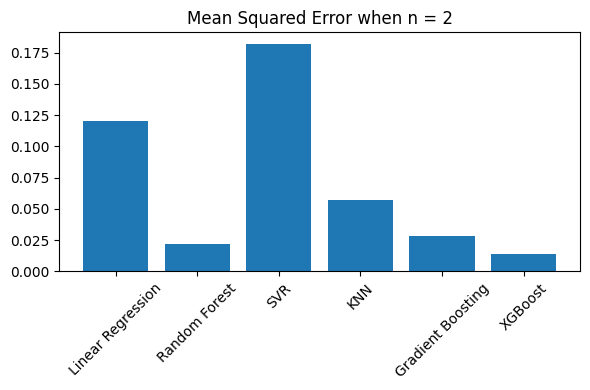

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

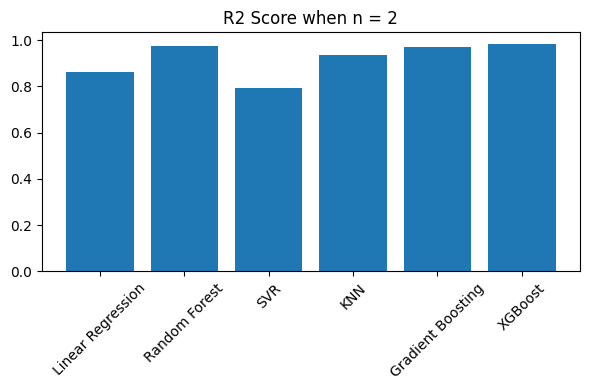

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Optional: Normalize MSE values to range 0 to 1
y_train_var = np.var(y_train)
normalized_mses = {
    'Linear Regression': mse_lr / y_train_var,
    'Random Forest': mse_rf / y_train_var,
    'SVR': mse_svr / y_train_var,
    'KNN': mse_knn / y_train_var,
    'Gradient Boosting': mse_gb / y_train_var,
    'XGBoost': mse_xgb / y_train_var
}

# Plot Normalized MSE
plt.figure(figsize=(6, 4))
plt.bar(normalized_mses.keys(), normalized_mses.values())
plt.title('Mean Squared Error when n = 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('mse_plot_n2.png', dpi=300)
plt.show()

# Download the Normalized MSE plot
files.download('mse_plot_n2.png')

# Plot R2 Score
plt.figure(figsize=(6, 4))
plt.bar(models, r2s)
plt.title('R2 Score when n = 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('r2_score_n2.png', dpi=300)
plt.show()

# Download the R2 Score plot
files.download('r2_score_n2.png')

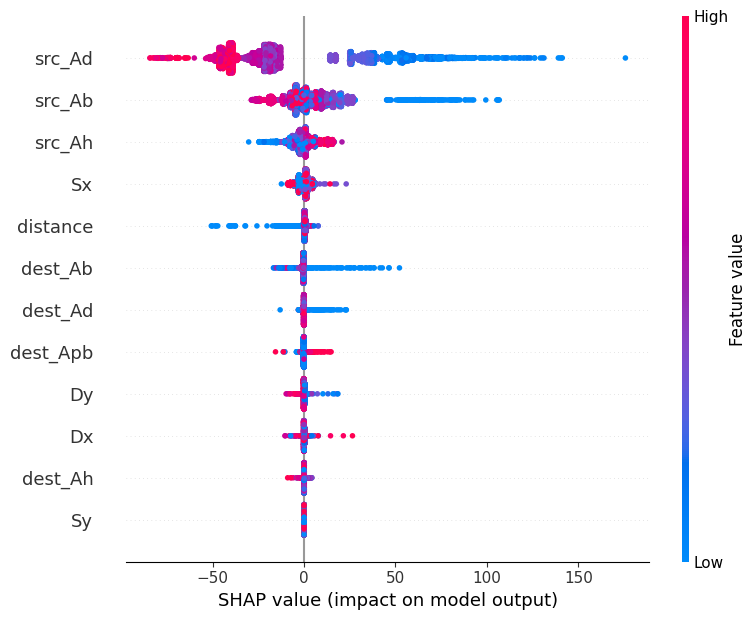

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shap
# Step 7: SHAP Analysis for feature importance
# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Plot the summary of SHAP values to show feature importance
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

# Save the plot as a PNG file
plt.savefig('shap_summary_plot_n2.png', dpi=300)
plt.close()  # Close the plot to free memory

# Download the saved plot file
files.download('shap_summary_plot_n2.png')

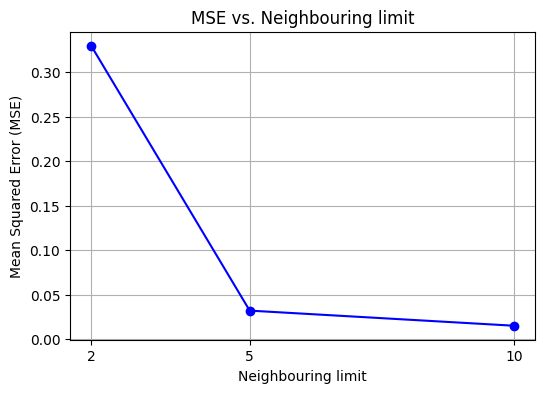

In [ ]:
import matplotlib.pyplot as plt
# Example MSE values for different n
n_values = [2, 5, 10]
mse_values = [0.330, .032, .015]

# Plot the line
plt.figure(figsize=(6, 4))
plt.plot(n_values, mse_values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Neighbouring limit')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Neighbouring limit')
plt.xticks(n_values)  # Ensure that all n values appear on the x-axis

# Optionally add gridlines
plt.grid(True)